In [25]:
import split_folders
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
#Set the working directory
os.chdir('/Users/mariahhurt/Desktop/')

In [18]:
#Use this function https://pypi.org/project/split-folders/
#To split into training and validation data folders for each class
split_folders.ratio('input', output="output", seed=1337, ratio=(.8, .2)) # default values



Copying files: 0 files [00:00, ? files/s]
Copying files: 104 files [00:00, 1039.21 files/s]
Copying files: 359 files [00:00, 1263.50 files/s]
Copying files: 618 files [00:00, 1492.65 files/s]
Copying files: 840 files [00:00, 1654.95 files/s]
Copying files: 1086 files [00:00, 1832.70 files/s]
Copying files: 1278 files [00:00, 1398.21 files/s]
Copying files: 1440 files [00:00, 1366.10 files/s]
Copying files: 1670 files [00:00, 1555.59 files/s]
Copying files: 1874 files [00:01, 1674.46 files/s]
Copying files: 2097 files [00:01, 1807.89 files/s]
Copying files: 2293 files [00:01, 1756.10 files/s]
Copying files: 2517 files [00:01, 1877.10 files/s]
Copying files: 2715 files [00:01, 1875.58 files/s]
Copying files: 2910 files [00:01, 1840.66 files/s]
Copying files: 3099 files [00:01, 1831.53 files/s]
Copying files: 3286 files [00:01, 1720.53 files/s]
Copying files: 3487 files [00:01, 1798.03 files/s]
Copying files: 3671 files [00:02, 1579.33 files/s]
Copying files: 3837 files [00:02, 1523.81 f

In [27]:
# Define the training and validation directory paths
train_dir = '/Users/mariahhurt/Desktop/output/train'
val_dir = '/Users/mariahhurt/Desktop/output/val'

In [82]:
# Initialize the model
model = models.Sequential()

# Feature extractor
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(13, 13, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Next layer no max pool, the images are very small in size and I do not want to reduce the amount of information 
# passed to the next layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Tried it with and without a third convolutional layer and got slightly better results by including it
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Deep feed-forward classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 11, 11, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

In [84]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [85]:
# Rescale so that all pixel values are between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Get the images from the directories
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(13, 13), batch_size=20, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(13, 13), batch_size=20, class_mode='binary')

Found 4377 images belonging to 2 classes.
Found 1095 images belonging to 2 classes.


In [86]:
# Train the model 
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=150,
    validation_data=val_generator,
    validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/150
100/100 [==============================] - 3s 29ms/step - loss: 0.6149 - acc: 0.7481 - val_loss: 0.5873 - val_acc: 0.7510
Epoch 2/150
100/100 [==============================] - 2s 25ms/step - loss: 0.5770 - acc: 0.7505 - val_loss: 0.5658 - val_acc: 0.7510
Epoch 3/150
100/100 [==============================] - 3s 29ms/step - loss: 0.5444 - acc: 0.7556 - val_loss: 0.5249 - val_acc: 0.7510
Epoch 4/150
100/100 [==============================] - 3s 29ms/step - loss: 0.5133 - acc: 0.7500 - val_loss: 0.4713 - val_acc: 0.7610
Epoch 5/150
100/100 [==============================] - 3s 26ms/step - loss: 0.4519 - acc: 0.7890 - val_loss: 0.4249 - val_acc: 0.7920
Epoch 6/150
100/100 [==============================] - 2s 21ms/step - loss: 0.4113 - acc: 0.8190 - val_loss: 0.3899 - val_acc: 0.8180
Epoch 7/150
100/100 [==============================] - 2s 22ms/step - loss: 0.3850 - acc: 0.8257 - val_

100/100 [==============================] - 2s 20ms/step - loss: 0.2744 - acc: 0.8903 - val_loss: 0.2820 - val_acc: 0.8950
Epoch 61/150
100/100 [==============================] - 2s 21ms/step - loss: 0.2608 - acc: 0.8905 - val_loss: 0.2850 - val_acc: 0.8940
Epoch 62/150
100/100 [==============================] - 2s 22ms/step - loss: 0.2810 - acc: 0.8848 - val_loss: 0.2809 - val_acc: 0.8920
Epoch 63/150
100/100 [==============================] - 3s 30ms/step - loss: 0.2651 - acc: 0.8913 - val_loss: 0.3015 - val_acc: 0.8840
Epoch 64/150
100/100 [==============================] - 2s 24ms/step - loss: 0.2928 - acc: 0.8770 - val_loss: 0.2812 - val_acc: 0.8850
Epoch 65/150
100/100 [==============================] - 3s 28ms/step - loss: 0.2644 - acc: 0.8908 - val_loss: 0.2810 - val_acc: 0.8870
Epoch 66/150
100/100 [==============================] - 3s 32ms/step - loss: 0.2629 - acc: 0.8938 - val_loss: 0.2883 - val_acc: 0.8890
Epoch 67/150
100/100 [==============================] - 2s 23ms/step

100/100 [==============================] - 2s 22ms/step - loss: 0.2467 - acc: 0.8998 - val_loss: 0.2602 - val_acc: 0.9000
Epoch 121/150
100/100 [==============================] - 2s 23ms/step - loss: 0.2443 - acc: 0.8985 - val_loss: 0.2806 - val_acc: 0.8940
Epoch 122/150
100/100 [==============================] - 2s 21ms/step - loss: 0.2440 - acc: 0.9074 - val_loss: 0.2560 - val_acc: 0.9070
Epoch 123/150
100/100 [==============================] - 2s 23ms/step - loss: 0.2484 - acc: 0.8990 - val_loss: 0.2605 - val_acc: 0.9030
Epoch 124/150
100/100 [==============================] - 2s 22ms/step - loss: 0.2431 - acc: 0.9039 - val_loss: 0.2959 - val_acc: 0.8800
Epoch 125/150
100/100 [==============================] - 2s 22ms/step - loss: 0.2483 - acc: 0.9000 - val_loss: 0.2753 - val_acc: 0.8950
Epoch 126/150
100/100 [==============================] - 2s 22ms/step - loss: 0.2405 - acc: 0.8990 - val_loss: 0.2609 - val_acc: 0.9030
Epoch 127/150
100/100 [==============================] - 2s 22

In [87]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

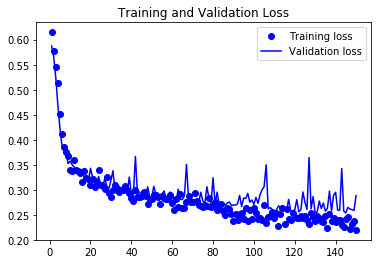

In [88]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

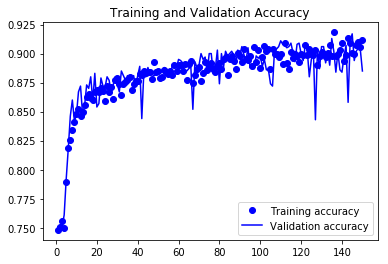

In [89]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()